In [1]:
import pandas, numpy, os

In [2]:
pwd

'/home/grotec/Repositories/lineage-tracking/barcode_scripts'

In [79]:
c1_bc1 = pandas.read_csv('../data/barcode_frequencies/C1test/C1test-BC1_frequencies.txt', sep='\t')

In [80]:
c1_bc1

,POP,BC1,0,10,20,30,40,50,60,70,...,1000,1010,1020,1030,1040,1050,1060,1070,1080,1090
0,CCCTCGGCAAGCATTA,CTCAGCTGGTCAGTTA,4.365561e-05,0.000032,0.000017,0.000021,0.000016,0.000013,0.000009,0.000002,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CCCTCGGCAAGCATTA,AACCTGTTCATGTGCG,9.490349e-07,0.000005,0.000007,0.000001,0.000003,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,CCCTCGGCAAGCATTA,AGGTAGGAGACAGTTG,5.694210e-06,0.000003,0.000004,0.000018,0.000002,0.000001,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,CCCTCGGCAAGCATTA,CTGAGTTGCCTAGGAA,0.000000e+00,0.000009,0.000009,0.000001,0.000008,0.000006,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CCCTCGGCAAGCATTA,CAGAGCGAAGGATATT,9.490349e-07,0.000005,0.000000,0.000003,0.000004,0.000005,0.000000,0.000002,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41202,CCCTCGGCAAGCATTA,GAATCGTTGGTTAGGT,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41203,CCCTCGGCAAGCATTA,GAGATCTCCATCTCTA,1.015467e-04,0.000058,0.000051,0.000059,0.000089,0.000082,0.000047,0.000067,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41204,CCCTCGGCAAGCATTA,ATGGAGGGCGTCTTGA,3.131815e-05,0.000019,0.000023,0.000007,0.000028,0.000062,0.000057,0.000062,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41205,CCCTCGGCAAGCATTA,TTGACTGGCTTTCCCG,9.490349e-07,0.000004,0.000000,0.000006,0.000003,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


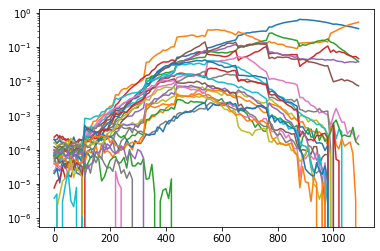

In [82]:
c1_bc1.sort_values(by='920', ascending=False).T.iloc[2:,:30].plot(logy=True, legend=False)

## Split up into mock multiple barcode dataset

In [83]:
intervals_per_epoch=11
generations_per_interval=10

In [84]:
timepoints = c1_bc1.columns[2:]

In [85]:
for epoch in range(1,len(timepoints)//intervals_per_epoch):
    print(epoch+1)
    epoch_start = timepoints[intervals_per_epoch*epoch]
    print(epoch_start)
    
    barcodes = c1_bc1.loc[:,:"BC1"]
    epoch_data = c1_bc1.loc[:,epoch_start:]
    for e in range(epoch+1):
        barcodes["BC{}".format(e+1)] = c1_bc1["BC1"]
    epoch_data = barcodes.join(epoch_data)
    
    epoch_data.to_csv('../data/barcode_frequencies/C1test/C1test-BC{}_frequencies.txt'.format(epoch+1), sep='\t')

2
110
3
220
4
330
5
440
6
550
7
660
8
770
9
880
10
990
